In [1]:
from tensorflow.keras.datasets import reuters
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("../crypto_apps.csv")

In [7]:
df.shape

(450, 12)

## Extracting topics with a local LLM

In [8]:
#!pip install ollama
#ref: https://github.com/ollama/ollama
#run in terminal: ollama run llama3.2:1b
import ollama
import google.generativeai as genai

Usar el texto 2 de la muestra para mostrar la inestabilidad del resultado.

In [1394]:
prompt_v1 = "You are an expert Customer Success Manager working int the Crypto Industry. \
    You are tasked with categorizing a list of user reviews for further analysis. \
    What category would you assing to the following review: {input_text}{categories}"

prompt_v2 = "You are an expert Customer Success Manager working int the Crypto Industry. \
    You are tasked with categorizing a list of user reviews for further analysis. \
    What category would you assing to the following review. \
    Provide your best guess in a sentence with no more than 4 words: {input_text}{categories}"

prompt_v3 = "You are an expert Customer Success Manager working int the Crypto Industry. \
    You are tasked with categorizing a list of user reviews for further analysis. \
    What category would you assing to the following review. \
    Provide your best guess in a sentence with no more than 4 words. \
    If you are unsure, your best guess is ok \
    : {input_text}{categories}"

prompt_v4 = "You are an expert Customer Success Manager working int the Crypto Industry. \
    You are tasked with categorizing a list of user reviews for further analysis. \
    What category would you assing to the following review. \
    Provide your best guess in a sentence with no more than 4 words. \
    If you are unsure, your best guess is ok \
    Do not include question marks \
    : {input_text}{categories}"

prompt_v5 = "You are an expert Customer Success Manager working int the Crypto Industry. \
    You are tasked with categorizing a list of user reviews for further analysis. \
    What category would you assing to the following review. \
    Provide your best guess in a sentence with no more than 4 words. \
    If you are unsure, your best guess is ok. \
    Do not include question marks. \
    Please answer with only 1 category. \
    If the review is just an expression of sentiment (eg: Great!, Bad!, etc). Please use the 'Generic feedback' category \
    : {input_text}{categories}"

prompt_v6 = "You are an expert Customer Success Manager working int the Crypto Industry. \
    You are tasked with categorizing a list of user reviews for further analysis. \
    Using the following instructions: \
    * If the review is just an expression of sentiment (eg: Great!, Bad!, etc). Please use the 'Generic feedback' category \
    * The category should have no more than 4 words. \
    * Please answer with only 1 category. \
    What category would you assing to the following review. \
    : {input_text}{categories}"

prompt_v7 = "You are an expert Customer Success Manager working int the Crypto Industry. \
    You are tasked with categorizing a list of user reviews for further analysis. \
    What category would you assing to the following review. \
    * If the review is just an expression of sentiment (eg: Great!, Bad!, etc). Please use the 'Generic feedback' category \
    * The category should have no more than 4 words. \
    * Please answer with only 1 category. \
    : {input_text}{categories}"

prompt_v8 = "You are an expert Customer Success Manager working int the Crypto Industry. \
    You are tasked with categorizing a list of user reviews for further analysis. \
    What category would you assing to the following review. \
    * If the review is just an expression of sentiment (eg: Great!, Bad!, etc). Please use the 'Generic feedback' category \
    * The category should have no more than 4 words. \
    * Answer with only 1 category. \
    * Group similar categories, i.e 'usability issues', 'usability' and 'ease of use', should be categorized as 'usability' . \
    : {input_text}{categories}"

prompt_v9a = "Can you list the most common categories that could exist within user reviews of a crypto mobile app?\
    Group similar categories into one, i.e: Customer Support and Customer Services should be grouped under Customer Support.\
    Provide your answer as a list, eg: [category1, category2,..]\
    : {input_text}{categories}"

prompt_v9b = "You are an expert Customer Success Manager working int the Crypto Industry.\
    You are tasked with categorizing a list of user reviews for further analysis\
    Please assign the review below to one of the following categories: {categories}\
    If the review is just an expression of sentiment (eg: Great!, Bad!, etc). Please use the 'Generic feedback' category.\
    Your answer should just be the category name.\
    : {input_text}"

In [1395]:
def ollama_query(prompt, categories="", input_text=""):
    prompt = prompt
    

    response = ollama.chat(
        model = "llama3.2:1b",
        messages = [{"role":"user", "content":prompt.format(input_text=input_text,categories=categories )}]    
    )

    return response["message"]["content"].strip()

In [1408]:
def gemini_query(prompt, categories="", input_text="", counter=0):
    prompt = prompt
    categories = categories
    input_text = input_text
    
    genai.configure(api_key="")
    model = genai.GenerativeModel("gemini-1.5-flash-latest")
    try:
        response = model.generate_content(prompt.format(input_text=input_text,categories=categories))
    except: 
        time.sleep(5)
        response = "gemini failed to respond"
        return response
    return response.text.strip()

## Prompt Testing

In [1409]:
print(prompt_v9a)

Can you list the most common categories that could exist within user reviews of a crypto mobile app?    Group similar categories into one, i.e: Customer Support and Customer Services should be grouped under Customer Support.    Provide your answer as a list, eg: [category1, category2,..]    : {input_text}{categories}


In [1410]:
print(prompt_v9b)

You are an expert Customer Success Manager working int the Crypto Industry.    You are tasked with categorizing a list of user reviews for further analysis    Please assign the review below to one of the following categories: {categories}    If the review is just an expression of sentiment (eg: Great!, Bad!, etc). Please use the 'Generic feedback' category.    Your answer should just be the category name.    : {input_text}


In [1401]:
 print(ollama_query(prompt_v9a))

Based on the typical structure of user reviews for a crypto mobile app, here are some common categories:

* General:
 + Ease of use
 + User interface
 + Customization options
 + Overall satisfaction
* Security and Safety:
 + Transaction security
 + Wallet security
 + Risk management
 + Exchange fees
* Payment Processing:
 + Fees and charges
 + Payment processing speed
 + Reversal policies
+ Merchant support
* Customer Support and Services:
 + Technical support
 + Help resources
 + Knowledge base
 + Email support
+ In-app messaging
* Community and Social Features:
 + Community engagement
 + Social sharing
 + Forum discussions
+ Events and webinars
* Business and Trading:
 + Investment opportunities
 + Market analysis tools
 + Trading fees
+ Regulatory compliance
* Customer Services (including: )
 + Customer support channels
 + Complaint resolution
 + Feedback mechanisms
+ Resolution times

I've grouped similar categories together to make it easier to identify common themes. Note that th

In [1411]:
res = gemini_query(prompt_v9a)

In [1412]:
category_list = res.strip("[|]").split(",")

In [1413]:
category_list

['Usability',
 ' Security',
 ' Features',
 ' Fees & Pricing',
 ' Customer Support',
 ' Performance & Speed',
 ' Wallet Functionality',
 '  Trading Experience',
 '  Account Management',
 '  Onboarding Process',
 '  Verification Process',
 '  Educational Resources',
 '  Community & Social Features',
 '  Overall Satisfaction']

In [1414]:
samples = df.content[:5]

In [1415]:
counter2=0
test_prompt = prompt_v9b
test_category = category_list
for sample in samples:
    counter2+=1
    print(f"********************* Sample {counter2} ***************")
    print("Sample text")
    print(sample)
    print("")
    print("Ollama Results: ", ollama_query(test_prompt, test_category,sample))
    print("")
    print("Gemini Results: ", gemini_query(test_prompt, test_category, sample))
    

********************* Sample 1 ***************
Sample text
Well I put btc in not much just because I was gonna try it out didn't like it sent my btc out again. I was dumb and did look before hand but they charge me $40 of the $200 i sent out. Which is 0.0004 in btc that's crazy. Maybe I don't k ow the standard but that seems really high.

Ollama Results:  ['Generic feedback']

Gemini Results:  Fees & Pricing
********************* Sample 2 ***************
Sample text
Great 👍

Ollama Results:  ['Generic feedback']

Gemini Results:  Generic feedback
********************* Sample 3 ***************
Sample text
Definitely going to delete this app. Can't log in

Ollama Results:  ['Fees & Pricing', 'Customer Support']

Gemini Results:  Account Management
********************* Sample 4 ***************
Sample text
a good way to invest, made easy.

Ollama Results:  ['Usability']

Gemini Results:  Onboarding Process
********************* Sample 5 ***************
Sample text
Awesome

Ollama Results:

## Split data

In [502]:
df_c = df.copy()

## Run queries

In [503]:
import time

In [513]:
results = []
test_prompt = prompt_v9b
test_category = category_list
perc_20 = df_c.shape[0]//5

#run llm 10 times to solve for topic stability

for i in range(3):
    counter1=0
    df_c = df.copy()

    topics_ollama = []
    topics_gemini = []
    print(f"Iteration {i} out of 10")
    for row in range(df_c.shape[0]):
        counter1+=1
        input_text = df_c.iloc[row].content
        topic = ollama_query(test_prompt, test_category,input_text)
        topic2 = gemini_query(test_prompt, test_category,input_text)
        topics_ollama.append(topic)
        topics_gemini.append(topic2)
        if counter1%perc_20 == 0:
            print(f"{counter1} out of {df_c.shape[0]} done.")
    df_c.loc[:, "local_llm_topic"] = topics_ollama
    df_c.loc[:, "gemini_llm_topic"] = topics_gemini
    results.append(df_c)
    

Iteration 0 out of 10
90 out of 450 done.
180 out of 450 done.
270 out of 450 done.
360 out of 450 done.
450 out of 450 done.
Iteration 1 out of 10
90 out of 450 done.
180 out of 450 done.
270 out of 450 done.
360 out of 450 done.
450 out of 450 done.
Iteration 2 out of 10
90 out of 450 done.
180 out of 450 done.
270 out of 450 done.
360 out of 450 done.
450 out of 450 done.


In [514]:
df.shape

(450, 13)

## Normalizing topics

In [515]:
df_all = pd.concat(results)

In [517]:
#df_all.to_csv("crypto_app_llm_tagged.csv", index=False)

In [1004]:
df_all = pd.read_csv("crypto_app_llm_tagged.csv")

In [1009]:
df_all.agg({
           "local_llm_topic":"nunique",
           "gemini_llm_topic":"nunique"})

local_llm_topic     407
gemini_llm_topic     16
dtype: int64

In [1010]:
df_all["gemini_llm_topic"] = df_all["gemini_llm_topic"].str.lower()

In [1011]:
df_all = df_all.reset_index()

In [1012]:
df_all["gemini_llm_topic"].value_counts()

gemini_llm_topic
gemini failed to respond                 533
generic feedback                         429
usability/user interface                 101
reliability/stability                     47
customer support                          39
account management                        30
features/functionality                    30
fees/pricing                              29
withdrawal process                        28
verification/kyc                          25
community/reputation                      20
transaction speed                         12
deposit process                           11
security                                   6
educational resources                      6
mobile app experience (if applicable)      4
Name: count, dtype: int64

In [1013]:
multiple_index = df_all.groupby("index")["gemini_llm_topic"].nunique() > 1

In [1014]:
df_all[multiple_index]

,index,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,app,normalized_topic,local_llm_topic,gemini_llm_topic


In [1015]:
failed = df_all["gemini_llm_topic"] == "gemini failed to respond"

In [1016]:
df_all = df_all[~failed]

In [1017]:
df_normalized_topics = df_all.groupby(["index","gemini_llm_topic"]).size().reset_index(name="count") .sort_values(by="count", ascending=False) \
     .groupby("index").first()

In [1018]:
df_normalized_topics["llm_topic"] = df_normalized_topics["gemini_llm_topic"].apply(lambda x: x.title())

In [1325]:
df["normalized_topic"] = df_normalized_topics["gemini_llm_topic"]

In [1326]:
#additional improvements could be with embeddings

In [1327]:
na = df["normalized_topic"].isna()

## Create DF_s

In [1328]:
df_s = df[~na].copy()

In [1329]:
df_s.shape

(352, 13)

In [1330]:
df_s["app"].value_counts()

app
co.mona.android    120
com.bybit.app      117
com.binance.dev    115
Name: count, dtype: int64

In [1331]:
index = df_s["app"] == "co.mona.android"

In [1332]:
df_s = df_s[index]

In [1333]:
#df_s["normalized_topic"].value_counts().reset_index().to_csv("topics_grouped.csv",index=False)

In [1334]:
df_s["normalized_topic"].value_counts()

normalized_topic
generic feedback                         34
usability/user interface                 22
fees/pricing                             12
reliability/stability                    12
account management                        8
customer support                          7
withdrawal process                        7
verification/kyc                          6
deposit process                           4
features/functionality                    2
educational resources                     2
community/reputation                      1
security                                  1
transaction speed                         1
mobile app experience (if applicable)     1
Name: count, dtype: int64

## Train test split

In [1335]:
from sklearn.model_selection import train_test_split

In [1336]:
X = df_s
y = df_s.normalized_topic

In [1337]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)


X_train = X_train.sample(X_train.shape[0]*20, replace=True)
#split text and labels
train_sentences = X_train.content.to_numpy()
train_labels = X_train.normalized_topic.to_numpy()
test_sentences = X_test.content.to_numpy()
test_labels = y_test.to_numpy()

In [1338]:
test_sentences.size

24

## Tokenize

In [1339]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

In [1340]:
from collections import Counter

In [1341]:
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

In [1342]:
#!pip install scikit-learn

In [1343]:
counter = counter_word(df_s.content)

In [1344]:
num_unique_words = len(counter)

In [1345]:
#vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences) #fit only to trainin

In [1346]:
#vectorize the labels
le = LabelEncoder()
le.fit(df_s.normalized_topic.to_numpy()) #fit only to trainin

LabelEncoder()

In [1347]:
le.inverse_transform([0])

array(['account management'], dtype=object)

In [1348]:
#each word has a unique index
word_index = tokenizer.word_index

In [1349]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

In [1350]:
y_train = le.transform(train_labels)
y_test = le.transform(test_labels)

In [1351]:
print(train_sentences[10:11])
print(train_sequences[10:11])

['Great 👍']
[[113, 184]]


As seen above, sequences can have different lengths since the sentences may contain a distinct number of words. We need all sequences to be of the same length, and for this we will use padding.

In [1352]:
#Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

#max number of words in a sequence
max_length = 255

train_padded = pad_sequences(train_sequences, maxlen= max_length, padding = "post", truncating = "post")
test_padded = pad_sequences(test_sequences, maxlen = max_length, padding = "post", truncating = "post")
train_padded.shape, test_padded.shape

((1920, 255), (24, 255))

In [1353]:
reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

In [1354]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [1355]:
decoded_text = decode(train_sequences[10])

In [1356]:
decoded_text

'great 👍'

## Train model

In [1357]:
num_classes = df_s["normalized_topic"].nunique()

In [1358]:
num_classes

15

In [1359]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [1360]:
model = keras.Sequential([
layers.Dense(num_classes*20, 
             #kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
             kernel_regularizer=regularizers.l2(0.002), 
             activation="relu"),
    
    layers.Dropout(0.3),
layers.Dense(num_classes*20, 
             #kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
             kernel_regularizer=regularizers.l2(0.002), 
             activation="relu"),
    
    layers.Dropout(0.3),
layers.Dense(num_classes*20, 
             #kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
             kernel_regularizer=regularizers.l2(0.002), 
             activation="relu"),
    
    layers.Dropout(0.3),
layers.Dense(num_classes, activation="softmax")
])

## Compile the model

In [1390]:
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

In [1391]:
len(train_padded)

1920

In [1392]:
#validation set
x_val = train_padded[:100]
partial_x_train = train_padded[100:]
y_val = y_train[:100]
partial_y_train = y_train[100:]

In [1393]:
history = model.fit(train_padded,
    y_train,
    epochs=200,
    batch_size=512,
    validation_split=0.7)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.9521 - loss: 0.7523 - val_accuracy: 0.9501 - val_loss: 0.7176
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9286 - loss: 1.0464 - val_accuracy: 0.9591 - val_loss: 0.6677
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9452 - loss: 0.7624 - val_accuracy: 0.9725 - val_loss: 0.6353
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9459 - loss: 0.6922 - val_accuracy: 0.9680 - val_loss: 0.6358
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9561 - loss: 0.6762 - val_accuracy: 0.9464 - val_loss: 0.6558
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9387 - loss: 0.6912 - val_accuracy: 0.9725 - val_loss: 0.6236
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9423 - loss: 0.6962 - val_accuracy: 0.9814 - val_loss: 0.6159
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9615 - loss: 0.6585 - val_accuracy: 0.9814 - val_loss

In [1365]:
#!pip install matplotlib

In [1366]:
import matplotlib.pyplot as plt

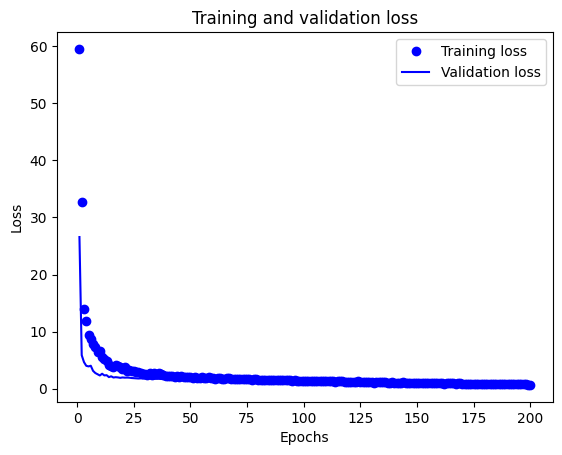

In [1367]:
#plotting the training and validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [1368]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

In [1369]:
train_metric = 'sparse_categorical_accuracy'
val_metric = 'val_sparse_categorical_accuracy'

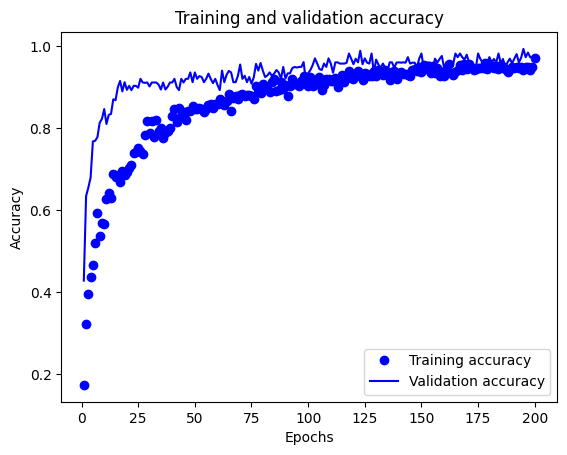

In [1370]:
#plotting the training and validation accuracy
plt.clf()
acc = history.history[train_metric]
val_acc = history.history[val_metric]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [1371]:
model.evaluate(test_padded, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 26.3931 - sparse_categorical_accuracy: 0.2917


[26.393089294433594, 0.2916666567325592]

In [1372]:
y_test

array([12,  0,  7,  3, 12, 14, 12,  1,  6,  7, 10,  2,  2,  7, 12,  2,  7,
        6,  5,  6,  9, 14,  9,  6])

In [1373]:
predictions = model.predict(test_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [1374]:
pred_list = []
for p in predictions:
   pred_list.append(p.argmax())

In [1375]:
from sklearn.metrics import f1_score

In [1381]:
f1_score(y_test, pred_list, average='micro')

0.2916666666666667

In [1377]:
qa_df = pd.DataFrame({"text":X_test.content.to_numpy(), 
              "true_value":le.inverse_transform(y_test), 
              "predicted_value": le.inverse_transform(pred_list)})

In [1378]:
for row in qa_df.to_dict(orient="records"):
    if row["predicted_value"]!= "generic feedback":
        print(row["text"])
        print("True value:",row["true_value"])
        print("Predicted value:", row["predicted_value"])
        print("***********************")

Informative and a user friendly interface! Easy to navigate!
True value: usability/user interface
Predicted value: usability/user interface
***********************
Edit: About their reply, I contacted them and was told they can't do anything. This is the worst option you could choose, I would recommend staying away from it unless you want to lose money and get stressed. The recommended way, "Instant Deposit", locks your account for external transfers for 7 BUSINESS days, with no warning at all. I used it, bought coins, tried to transfer them and found out I'm locked. If I want to sell the coins or swap to another, it'll eat 12%, so its not worth it.
True value: account management
Predicted value: withdrawal process
***********************
Can't use my debit card anymore. To buy for no reason.
True value: deposit process
Predicted value: reliability/stability
***********************
I give three stars, can't find my Way around the app. I can't even cash out my money.😤
True value: usabil